# Longitudinal dynamics at FLASH #

Here some considerations on *longitudinal dynamics* at FLASH are presented, with a focus on additional compressor for FLASHForward. This means, we will consider the dynamics only in the longitudinal plane of the phase-space.

## Notations ##

We will denote the longitudinal coordinate as $z$ (with respect to the bunch center of mass longitudinally, that is $\overline{z}=0$), absolute momentum as $p$ and relative momentum deviation as $\delta$:

$$\delta = \frac{p-\overline{p}}{\overline{p}},$$
where $\overline{p}$ denotes the average momentum over the ensemble. Due to this definition, $\overline{\delta}=0$. (Strictly speaking, if we are talking about the longitudinal dynamics, we should consider the longitudinal projection of the total momentum, $p_z$, as the variable, conjugate to $z$. However, typically $p_x,p_y\ll p_z$, therefore it's justified to take $p_z\approx p$).

Microscopic (complete) description of a bunch with $N$ particles is given by specifying the coordinates of each particle in the longitudinal phase-space plane, that is $\{z_i, p_i\}$, where $i$ runs from 1 to $N$. Such set of $2N$ numbers is needed for a one-dimensional tracking code like the one implemented below (a three-dimensional code like elegant would of course need $6N$ numbers). This (discrete) particle distribution can be also replaced by the two-dimensional phase-space particle density function:
$$f(z,p),$$
such that $f(z,p)dzdp$ gives the probability to find a particle with momentum in the region $[p,p+dp]$ and with coordinate $[z,z+dz]$. It goes without saying that $\int f(z,p) dz dp =1$. Alternatively, we can use a two-dimensional phase-space charge density function:
$$q(z,p),$$
which is related to the density function like
$$
q(z,p) = Q f(z,p),
$$
where $Q$ is the total bunch charge ($Q=Ne$). 

The line charge density is just
$$
\lambda(z) = \int q(z,p)dp,
$$
and the long-sought current profile is just (assuming the ultrarelativistic beam):
$$
I(z) = c\lambda(z)
$$

## Phase-space density transformations (UNFINISHED) ##
The beam undergoes some motion, that is coordinates of every particle can undergo some transformation:
$$
z_i \to z_i'
$$
$$
p_i \to p_i'
$$
This will change the phase-space density: the beam will reside in a different region on the plane $(z,p)$.
We will restrict ourselves to linear transformations, that is
$$
z_i' = A z_i + B p_i
$$
$$
p_i' = C z_i + D p_i
$$
For this case, the new density fullfills (due to particle number conservation):
$$
f(z,p) dz dp = f'(z',p') dz' dp'
$$
(think of a region $dz\times dp$ around a point $(z,p)$ which transforms into a new region $dz' \times dp'$ around $(z',p')$; all particles in the 1st region and up in the 2nd region; in addition, no other particles end up in region 2 - due to the special case of the transformation considered).

## Acceleration in an RF-module ##
In a module, every particle of the gains some energy, while it's longitudinal position (with respect to the center of the bunch) doesn't change.
Therefore, the coordinate transformation:
$$
z_i \to z_i
$$
$$
p_i \to p_i + \Delta p_i
$$
The momentum gain $\Delta p_i$ depends on the longitudinal coordinate due to the following reason.
The accelerating field is a sinusoidal wave, travelling at the speed of light $c$. We assume that the electron beam is ultrarelativistic, therefore it also moves at $c$. This means that the field experienced by a given electron in the bunch doesn't change with time! However, the electron bunch has a specific length. Therefore, depending on the position within the bunch, the electric field, and therefore the gain will be different:
$$
\Delta p_i = \Delta p_i(z_i)
$$
 
By **phase** $\phi$ of the module we will denote the phase of the wave seen by the particle at $z=0$, that is by electron sitting in the center of the bunch. Convention at FLASH is that $\phi=0$ means maximum acceleration field, therefore the *crest* of the wave. Therefore we say it is *on-crest*. By **amplitude** of the given RF-module we understand the energy gain of the *on-crest particle*.
Therefore
$$
\Delta p_i(0) = V
$$
For arbitrary particle within the bunch:
$$
\Delta p_i(z_i) = V \cos{(k z_i + \phi)},
$$
where $k=2\pi/\lambda=2\pi\nu/c$ is the wavenumber of the wave, related to its wavelength $\lambda$ or frequency $\nu$. For FLASH modules $\nu=1.3$GHz except of ACC39 which has $\nu=3.9 GHz$.

In summary, the RF module modifies the particle coordinates in the following way:
$$
\begin{cases}
z_i \to z_i\\
p_i \to p_i + V \cos{(k z_i + \phi)}
\end{cases}
$$

## Compression ##
In a compressor, the opposite happens: the particle energy doesn't change (we neglect any CSR effects here), while the longitudinal position does:
$$
\begin{cases}
z_i \to z_i - \delta_i R_{56}\\
p_i \to p_i
\end {cases} 
$$
Here $R_{56}$ is the *longitudinal dispersion* of the compressor, and $\delta_i$ is the relative momentum deviation of the particle (see above). Note: the first equation neglects all higher order terms (in $\delta$).

## FLASH Linac layout ##
We first consider the linac part of FLASH, consisting of:
* **GUN** - a normal-conducting 1.5-cell RF-cavity, which in combination with a cathode and a laser generates ~5 MeV, ~5 ps bunches. We don't consider processes in the gun - i.e. we make some assumptions about the beam exiting the gun. 
* **ACC1** - a superconducting RF-module giving the boost of ~160 MeV. By operating it off-crest, the chirp necessary for subsequent compression is applied (more on that later)
* **ACC39** - a 3rd harmonic RF-module (that is operates at frequency exactly three times higher than the other modules). In combination with ACC1 it allows to imprint the linear chirp rather than the cosine-shape (more on that later). Typically operated at phases close to $180^\circ$, that is it's decelerating (typically by around 20 MeV).
* **BC2** - a 4-magnet C-chicane compressor with $R_{56}=-0.18$m. The negatively-chirped beams from ACC1+ACC39 are therefore compressed.
* **ACC23** - two RF modules giving a total boost of around 300 MeV. By operating it off-crest, we can further manipulate the chirp.
* **BC3** - a 6-magnet S-chicane compressor.
* **ACC47** - another four RF-modules, accelerating the beam further.

The index will denote the quantities **directly after** the component, e.g. $I_{ACC39}$ means the current after ACC39 and thus before BC2.

## Beam dynamics at FLASH - simple model ##
Here we will derive analytical expressions for FLASH, assuming some simple beam shape distributions. 
### Gun ###
Let's assume a gaussian current profile after gun:
$$
I_{\rm GUN}(z)=I_0 \exp{-\frac{-z^2}{2\sigma^2_{z,\rm GUN}}},
$$
This gives the longitudinal line charge density:
$$
\lambda_{\rm GUN}(z)=\frac{I_0}{c}\exp{-\frac{-z^2}{2\sigma^2_{z,\rm GUN}}}
$$
Also, let's assume an unchirped beam. For simplicity, lets' assume there is no slice momentum spread, so:
$$
p_{\rm GUN}(z) =  p_0 = const
$$

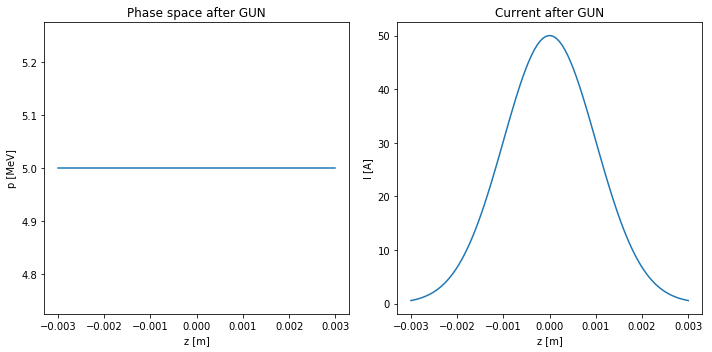

In [34]:
from matplotlib import pyplot as plt
import numpy as np
sigma_z=1e-3
nsamples=100
p0=5
I0=50
c=3e8
z = np.linspace(-3*sigma_z, 3*sigma_z, nsamples)
p = p0*np.ones(nsamples)
I = I0 * np.exp(-z**2 / (2*sigma_z**2))
plt.figure(figsize=(10,5))
plt.gcf().add_subplot(1,2,1)
plt.plot(z,p)
plt.title('Phase space after GUN');
plt.xlabel('z [m]');
plt.ylabel('p [MeV]');
plt.gcf().add_subplot(1,2,2)
plt.plot(z, I)
plt.title('Current after GUN')
plt.xlabel('z [m]');
plt.ylabel('I [A]');
plt.tight_layout()

### ACC1 and ACC39 ###
The ACC1 will imprint a cosine-like dependence of the momentum on the longitudinal coordinate:
$$
p_{\rm ACC1}(z) = p_{\rm GUN}(z) + V_{\rm ACC1} \cos{(k z + \phi_{\rm ACC1})} = p_0 + V_{\rm ACC1} \cos{(k z + \phi_{\rm ACC1})}
$$
The ACC39 operates at a triple frequency, therefore:
$$p_{\rm ACC39}(z) = p_{\rm ACC1}(z) + V_{\rm ACC39} \cos{(3k z + \phi_{\rm ACC39})}=$$
$$=p_0 + V_{\rm ACC1} \cos{(k z + \phi_{\rm ACC1})}+ V_{\rm ACC39} \cos{(3k z + \phi_{\rm ACC39})}$$
Reminder: z=0 is always the (longitudinal) center of the bunch and module phases are defined such that $\phi_{\rm ACCX}=0$ is on-crest, that is maximum acceleration.

Already at the gun, the bunch length is much shorter than a period of the wave. Therefore, we are only interested in the behaviour of these functions in the vicinity of $z=0$. Therefore we expand it into the Taylor series around $z=0$:
$$
p_{\rm ACC39}(z) = p_{\rm ACC39}(z)\biggr\rvert_{z=0}+\frac{dp}{dz}\biggr\rvert_{z=0}z+\frac{d^2p}{dz^2}\biggr\rvert_{z=0}z^2+\frac{d^3p}{dz^3}\biggr\rvert_{z=0}z^3 \equiv \\
p(0)+p'(0)z+p''(0)z^2+p'''(0)z^3
$$

We terminate at the third order because we have **four free parameters** at our disposal: $V_{\rm ACC1}$, $V_{\rm ACC39}$, $\phi_{\rm ACC1}$, $\phi_{\rm ACC39}$. Therefore we have freedom to vary only **four parameters defining $p(z)$**. These can be chosen to be  $p(0)$, $p'(0)$, $p''(0)$, $p'''(0)$.

Let's calculate these derivatives:
$$
p'(z)\equiv\frac{dp}{dz}=-kV_{\rm ACC1}\sin{(kz+\phi_{\rm ACC1})}-3kV_{\rm ACC39}\sin{(3kz+\phi_{\rm ACC39})}\\
p''(z)\equiv\frac{d^2p}{dz^2}= -k^2V_{\rm ACC1}\cos{(kz+\phi_{\rm ACC1})}-9k^2V_{\rm ACC39}\cos{(3kz+\phi_{\rm ACC39})}\\
p'''(z)\equiv\frac{d^3p}{dz^3}= k^3V_{\rm ACC1}\sin{(kz+\phi_{\rm ACC1})}+27k^3V_{\rm ACC39}\sin{(3kz+\phi_{\rm ACC39})}
$$
For $z=0$:
$$
\begin{cases}
p(0)=p_0+ V_{\rm ACC1}\cos{(\phi_{\rm ACC1})}+ V_{\rm ACC39} \cos{(\phi_{\rm ACC39})}\\
p'(0)\equiv\frac{dp}{dz}\biggr\rvert_{z=0}=-kV_{\rm ACC1}\sin{(\phi_{\rm ACC1})}-3kV_{\rm ACC39}\sin{(\phi_{\rm ACC39})}\\
p''(0)\equiv\frac{d^2p}{dz^2}\biggr\rvert_{z=0}= -k^2V_{\rm ACC1}\cos{(\phi_{\rm ACC1})}-9k^2V_{\rm ACC39}\cos{(\phi_{\rm ACC39})}\\
p'''(0)\equiv\frac{d^3p}{dz^3}\biggr\rvert_{z=0}= k^3V_{\rm ACC1}\sin{(\phi_{\rm ACC1})}+27k^3V_{\rm ACC39}\sin{(\phi_{\rm ACC39})}
\end{cases}
$$

So now we indeed clearly see the relationship between the **four RF parameters** and the **four paramerers defining $p(z)$**.

Let's discuss these latter parameters in more detail:
* $p(0)$ - this is the **overall momentum** of the bunch (more precisely, the momentum at $z=0$. Typically it is desired to keep it fixed in a bunch compressor. For BC2 this is 145 MeV, for BC3 450 MeV.
* $p'(0)$ - the first derivative is directly related to the **momentum chirp** $h$: $$h=\frac{1}{p(0)}\frac{dp}{dz}\biggr\rvert_{z=0}\equiv \frac{p'(0)}{p(0)}$$
  If we require some specific chirp $h$ we of course get a constraint 
  $$
  p'(0)=h p(0)
  $$
  For compression we need a negative chirp, means $p'(0)<0$.
* $p''(0)$ and $p'''(0)$ affect the **linearity of the $p(z)$**. Typically we want a so-called *linear compression*, which means that the dependence $p(z)$ is a straight line (also called linear phase-space). This puts two more constraints: 
$$
\begin{cases}
p''(0)=0\\
p'''(0)=0
\end{cases}
$$

It is convenient to introduce the *voltage ratio* $r=V_{\rm ACC1}/V_{\rm ACC39}$. If we know both phases and $r$, it is easy to use the overall momentum constraint (1st equation) to find $V_{\rm ACC1}$ and then $V_{\rm ACC39}=V_{\rm ACC1}/r$. 

In the general case, we can just solve the system numerically. Below we will consider some simplifying constraints.

#### Phase-space linearity: $p''(0)=0$ ####
For a linear compression ($p(z)$ close to a straight line) we should at least require that the 2nd derivative vanishes at $z=0$: 
$$
p''(0)=0\\
-k^2V_{\rm ACC1}\cos{(\phi_{\rm ACC1})}-9k^2V_{\rm ACC39}\cos{(\phi_{\rm ACC39})}=0\\
r\cos{(\phi_{\rm ACC1})}+9\cos{(\phi_{\rm ACC39})}=0\\
\boxed{r=-9 \frac{\cos{(\phi_{\rm ACC39})}}{\cos{(\phi_{\rm ACC1})}}}
$$
Therefore, we obtained the ratio between the voltages of ACC1 and ACC39, $r=V_{\rm ACC1}/V_{\rm ACC39}$, for given phases of ACC1 and ACC39 which is necessary to obtain a 'straight' $p(z)$ at $z=0$ (alternatively, one could pick $r$ and one of the phases and determine the other phase).

Since amplitudes are taken to be positive, $\cos(\phi_{\rm ACC1})$ and $\cos(\phi_{\rm ACC39})$ must have opposite signs. ACC1 is typically operated close to $\phi_{\rm ACC1}=0$ (in order to ensure high enery gain), therfore the ACC39 has to be operated at around $\phi_{\rm ACC39}=\pi$, therefore it *decelerates* the beam.
For on-crest operation, $\phi_{\rm ACC1}=0$ and $\phi_{\rm ACC39}=\pi$, therefore $r=9$.

So far we used one requirement ($p''(0)=0$) to get one constraint. Additonally we could put a requirement on the chirp. If, for example, we require no chirp at $z=0$:
$$
p'(0)=0\\
-kV_{\rm ACC1}\sin{(\phi_{\rm ACC1})}-3kV_{\rm ACC39}\sin{(\phi_{\rm ACC39})}=0\\
r\sin{(\phi_{\rm ACC1})}+3\sin{(\phi_{\rm ACC39})}=0\\
-9 \frac{\cos{(\phi_{\rm ACC39})}}{\cos{(\phi_{\rm ACC1})}}\sin{(\phi_{\rm ACC1})}+3\sin{(\phi_{\rm ACC39})}=0\\
\tan{(\phi_{\rm ACC39})}=3\tan{(\phi_{\rm ACC1})}
$$
For small angles (in radians) $\phi\ll 1$, $\tan{\phi}\approx \phi$, therefore
$$\phi_{\rm ACC39}\approx 3\phi_{\rm ACC1} + \pi n, {\rm if} \phi_{\rm ACC1}\ll1,$$ where $n\in\mathbb{Z}$ (remember, $\cos(\phi_{\rm ACC1})$ and $\cos(\phi_{\rm ACC39})$ must have opposite signs to ensure $r>0$, see above). 
As we see, on-crest operation $\phi_{\rm ACC1}=0$ and $\phi_{\rm ACC39}=\pi$ satisfies this requriement!

As another example, let's take a typical ACC1 phase of $\phi_{\rm ACC1}=5^\circ$. The ACC39 phase is therefore $\phi_{\rm ACC39}\approx 15^\circ+180^\circ=195^\circ$ (this is of course equivalent to $-165^\circ$). Exact calculation gives $\phi_{\rm ACC39}=194.706^\circ$. For these angles, the voltage ratio is:
$$
r=-9 \frac{\cos{(194.706^\circ)}}{\cos{(5^\circ)}}=8.738.
$$

#### Phase-space linearity: $p''(0)=0$ and  $p'''(0)=0$ #####
We could also require that both 2nd and 3rd derivatives should vanish:
$$
\begin{cases} 
p''(0)=0 \\
p'''(0)=0
\end{cases}
$$

$$
\begin{cases} 
-k^2V_{\rm ACC1}\cos{(\phi_{\rm ACC1})}-9k^2V_{\rm ACC39}\cos{(\phi_{\rm ACC39})}=0 \\
k^3V_{\rm ACC1}\sin{(\phi_{\rm ACC1})}+27k^3V_{\rm ACC39}\sin{(\phi_{\rm ACC39})} = 0
\end{cases}
$$

$$
\begin{cases} 
r\cos{(\phi_{\rm ACC1})}+9\cos{(\phi_{\rm ACC39})}=0 \\
r\sin{(\phi_{\rm ACC1})}+27\sin{(\phi_{\rm ACC39})}=0
\end{cases}
$$

We get a new phase condition
$$
\boxed{\tan{(\phi_{\rm ACC39})}=1/3\tan{(\phi_{\rm ACC1})} }
$$
If we require chirp to be zero, we have to also satisfy $\tan{(\phi_{\rm ACC39})}=3\tan{(\phi_{\rm ACC1})}$, therefore the only solution will be $\phi_{\rm ACC1}=0$ and $\phi_{\rm ACC39}=\pi$!

### Summary ###
We can summarise our constraints on the RF parameters in the following way:
$$
\begin{cases}
p(0)=p_{\rm BC2} \Longleftrightarrow p_{\rm BC2}=p_0+ V_{\rm ACC1}(\cos{\phi_{\rm ACC1}}+ 1/r \cos{\phi_{\rm ACC39}})\\
h=p'(0)/p(0) \Longleftrightarrow hp_{\rm BC2}=-kV_{\rm ACC1}(\sin{\phi_{\rm ACC1}}-3/r\sin{\phi_{\rm ACC39}})\\
p''(0)=0 \Longleftrightarrow r=-9 \frac{\cos{\phi_{\rm ACC39}}}{\cos{\phi_{\rm ACC1}}} \\
p'''(0)=0 \Longleftrightarrow \tan{\phi_{\rm ACC39}}=1/3\tan{\phi_{\rm ACC1}}\\
\end{cases}
$$
Here $p_{\rm BC2}$ is the desired total energy gain in BC2 (typically $p_{\rm BC2}$=145 MeV) and $h$ is the desired momentum chirp ($h<0$); the magnitude depends on the desired compression in BC2.

One can directly solve the system for the desired chirp. 
Below a simplified "algorithm" of this system is implemented:
* a phase $\phi_{\rm ACC1}$ is used as input
* based on the constraint $p'''(0)=0$, $\phi_{\rm ACC39}$ is calculated
* based on the constraint $p''(0)=0$, $r$ is caluclated
* based on the total energy constraint, $V_{\rm ACC1}$ is calculated
* now the chirp is calculated and compared to the desired value.

In [94]:
# implementation of the above algorithm
# input: ACC1 phase
# constraints: p''(0)=0, p'''(0)=0, total energy in BC2 = 145 MeV

# ACC1 phase
phase_ACC1_deg = 5

# fixed parameters
p0=5 # energy after the the gun
pBC2 = 145 # desired energy in the compressor
R56BC2 = -0.18

f=1.3e9
c=3e8
k = 2 * np.pi * f / c
phiACC1 = np.radians(phase_ACC1_deg)
phiACC39 = np.arctan(np.tan(phiACC1)/3)+np.pi
r=-9*np.cos(phiACC39)/np.cos(phiACC1)
VACC1 = (pBC2 - p0)/(np.cos(phiACC1)+np.cos(phiACC39)/r)
VACC39 = VACC1/r
p_ACC39 = p0 + VACC1 * np.cos(phiACC1) + VACC39 * np.cos(phiACC39)
h = (-k*VACC1*np.sin(phiACC1)-3*k*VACC39*np.sin(phiACC39))/p_ACC39
C=1/np.abs(1-h*R56BC2)

print('Given:\n')
print('\tACC1 phase = {0} degrees'.format(np.degrees(phiACC1)))

print('\nRequiring 2nd and 3rd order derivatives to vanish and pBC2 = {0} MeV:\n'.format(pBC2))
print('\tACC39 phase = {0} degrees'.format(np.degrees(phiACC39)))
print('\tVACC1/VACC39 = {0}'.format(r))
print('\tVACC1 = {0} MeV'.format(VACC1))
print('\tVACC39 = {0} MeV'.format(VACC39))
print('\tp_ACC39 = {0} MeV (target={1} MeV)'.format(p_ACC39, pBC2))
print('\tchirp h = {0} '.format(h))
print('\texpected compression in BC2 (R56={0}m): {1}'.format(R56BC2, C))

Given:

	ACC1 phase = 5.0 degrees

Requiring 2nd and 3rd order derivatives to vanish and pBC2 = 145 MeV:

	ACC39 phase = 181.67043694469768 degrees
	VACC1/VACC39 = 9.030539234487946
	VACC1 = 158.1016244130772 MeV
	VACC39 = 17.507440066179164 MeV
	p_ACC39 = 144.99999999999997 MeV (target=145 MeV)
	chirp h = -2.299925570307525 
	expected compression in BC2 (R56=-0.18m): 1.7064456282590432


### BC2 ###
....

### ACC23 and BC3 ###
...

### ACC47 ###
...

## Simple tracking through FLASH ##
The code below allows to cross-check the above calculations by **tracking** a particle distribution (without any collective effects). The compression is to 1st order only (only $R_{56}$ is taken into account)

In [91]:
from matplotlib import pyplot as plt
import numpy as np
c=3e8

class Beam:
        
    def __init__(self):
        self.p = None
        self.z = None
        self.deltas = None
        self.charge = charge
        
    def getMean_p(self):
        return np.mean(self.p)
    
    def calculate_deltas(self):
        self.delta = self.p / self.getMean_p() - 1
        
    def getChirp(self):
        pass
        
    def generateDoubleGauss(self, p_mean, sigma_p, chirp, z_mean, sigma_z, nparticles):
        self.z = np.random.normal(z_mean, sigma_z, nparticles)
        p = []
        for z in self.z:
            p.append(np.random.normal(p_mean * (1+ z*chirp), sigma_p, 1)[0]) # is there a better way than this loop?
        self.p=np.array(p)
        self.calculate_deltas()

    def plotPhaseSpace(self):
        plt.xlabel('z [m]')
        plt.ylabel('p [MeV]')
        plt.plot(self.z, self.p, 'o')
        #plt.title('h(0)')

    def plotPhaseSpaceRel(self):
        plt.xlabel('z [m]')
        plt.ylabel('delta')
        plt.plot(self.z, self.delta, 'o')

class Module:
    def __init__(self, amplitude, phase, frequency):
        self.amplitude = amplitude
        self.phase = np.deg2rad(phase)
        self.k = 2* np.pi * frequency / c
    def track(self, old_beam):
        new_beam = Beam()
        new_beam.z = old_beam.z
        new_beam.p = old_beam.p + self.amplitude * np.cos(self.k * old_beam.z + self.phase)
        new_beam.calculate_deltas()
        return new_beam

class Compressor:
    def __init__(self, R56):
        self.R56 = R56
    def track(self, old_beam):
        new_beam = Beam()
        new_beam.z = old_beam.z - self.R56 * old_beam.delta
        new_beam.p = old_beam.p
        new_beam.calculate_deltas()
        return new_beam

class Linac:
    def __init__(self, *args):
        self.components = []
        for arg in args:
            self.components.append(arg)
    def initBeam(self, beam):
        self.beam = []
        self.beam.append(beam)
    def track(self):
        for c in self.components:
            old_beam = self.beam[-1]
            new_beam = c.track(old_beam)
            self.beam.append(new_beam)

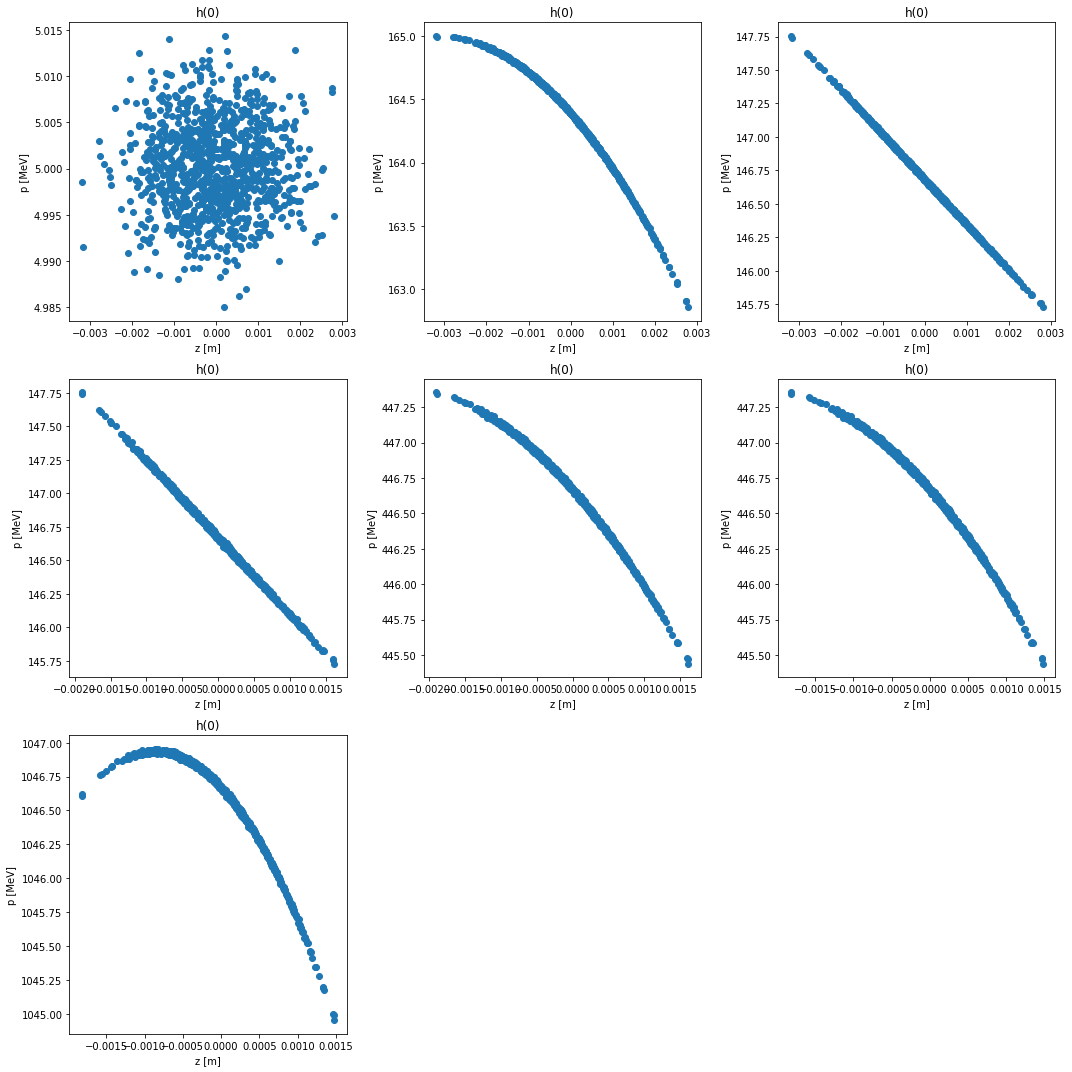

In [84]:
freq = 1.3e9

ACC1 = Module(158.1016244130772, 5, freq)
ACC39 = Module(17.507440066179164, 181.67043694469768, 3*freq)
ACC23 = Module(300, 0, freq)
ACC4567 = Module(600, 0, freq)
BC2 = Compressor(-0.18)
BC3 = Compressor(-0.05)

FLASH = Linac(ACC1, ACC39, BC2, ACC23, BC3, ACC4567)

p0, sigma_p, chirp = 5, 5e-3, 0
z0, simga_z = 0, 1e-3
charge, nparticles = 500e-12, 1000
b = Beam(charge)
b.generateDoubleGauss(p0, sigma_p, chirp, z0, sigma_z, nparticles)
FLASH.initBeam(b)
FLASH.track()

plt.figure(figsize=(15,15))
i=1
for b in FLASH.beam:
    plt.gcf().add_subplot(3, 3, i)
    b.plotPhaseSpace()
    i+=1
plt.tight_layout()
